# 0_Initialization

In [1]:
from safedigital import mechanical as ME  # import mechanical module
import os
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from MRC.sswgmm_mech import mech_monitor as mm
sns.set(color_codes=True)
cur_directory = r'C:\Users\cnbofan1\ABB\Safe Digital in CN - Documents - Documents\06_Test and Analytics'
dir_data_washed = (cur_directory + '\\' +
                   '20230525_ME_SA12kV_SGCC_V_Life_Test' + '\\'
                   + '1_Data formatted')
dir_data_raw = (cur_directory + '\\' +
                '20230525_ME_SA12kV_SGCC_V_Life_Test' + '\\' +
                '0_Data original')
path_config = cur_directory + '\\01_Code\\lib\\sswgmm_mech\\config.json'

# 1_Data re-organization

In [ ]:
# ME.DataClean.txt_to_csv(dir_data_raw, dir_data_washed)

# 2_Data preview

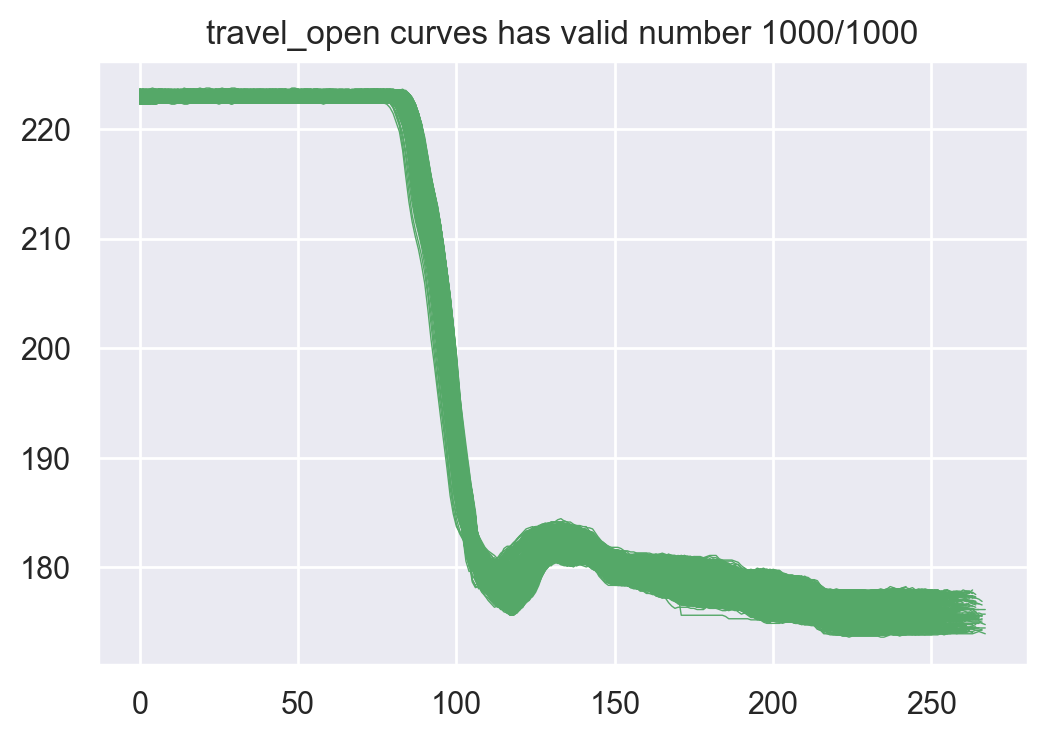

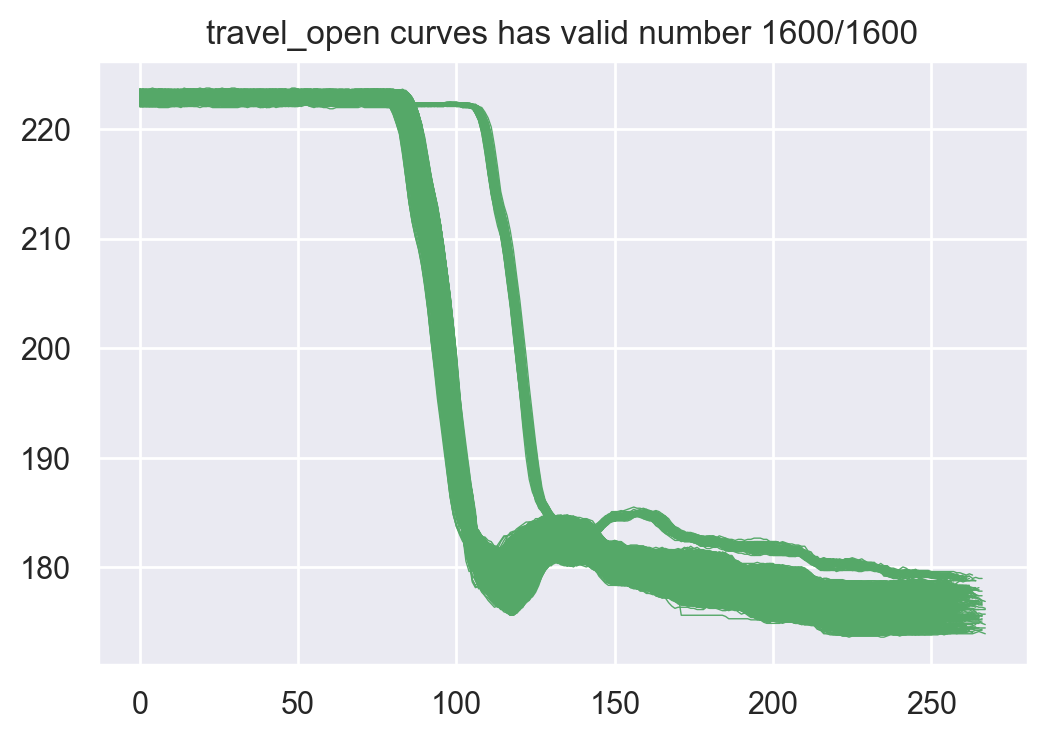

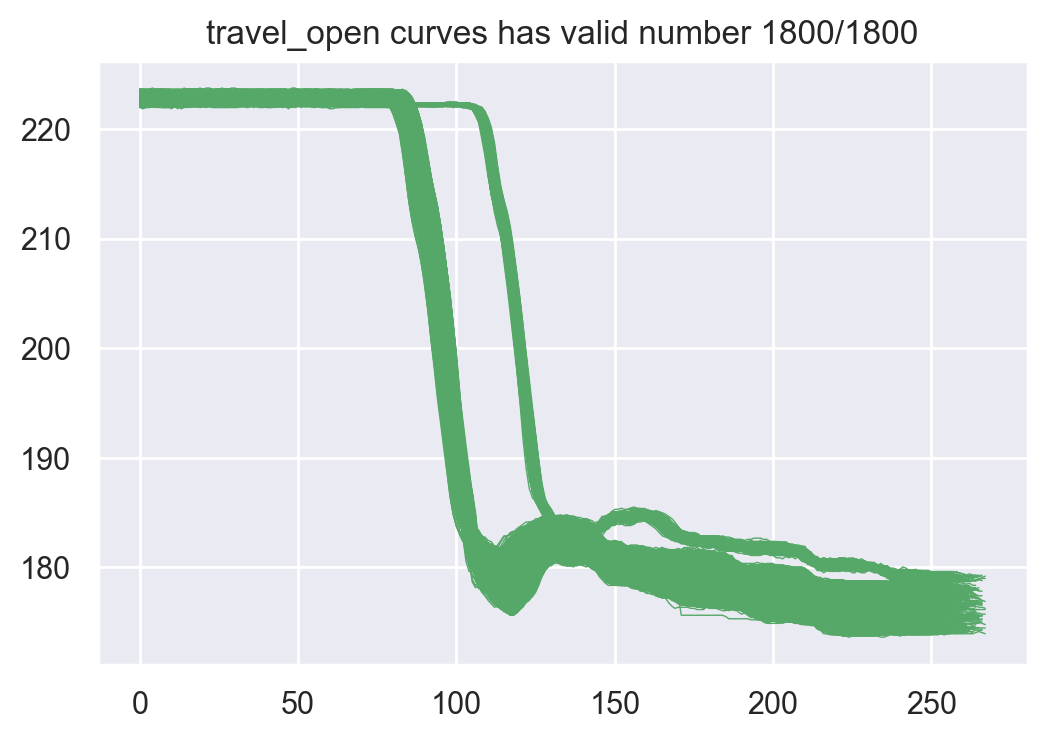

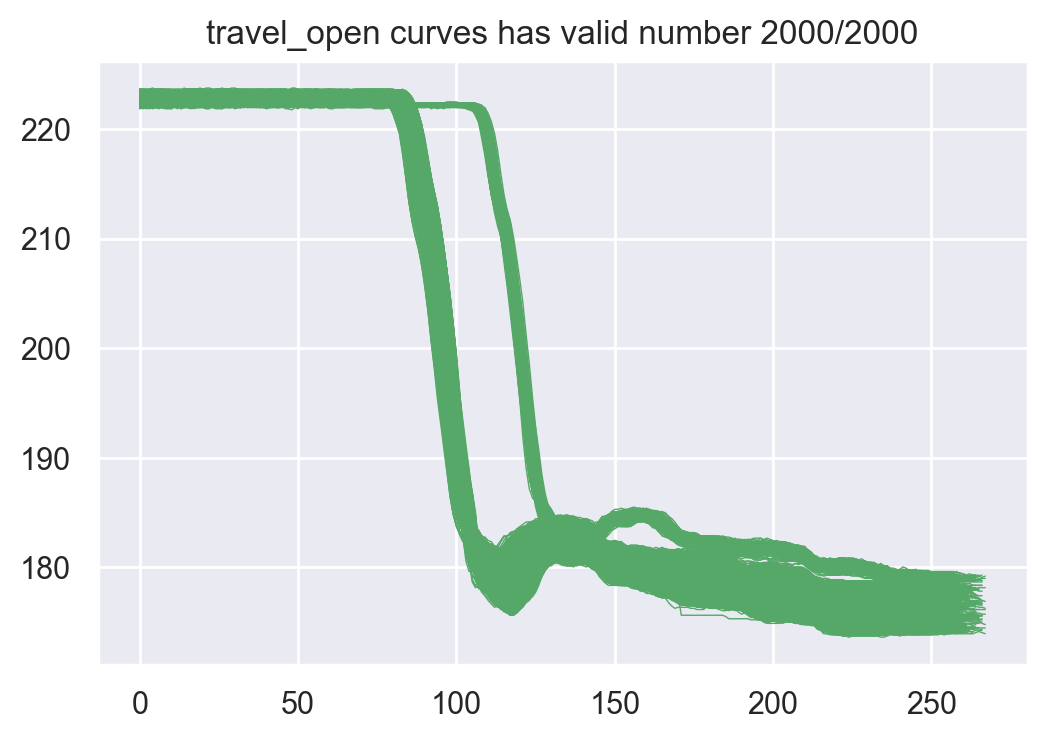

In [3]:
ME.DataClean.curve_preview(dir_data_washed, 'travel_open', num_curve=1000)
# ME.DataClean.curve_preview(dir_data_washed, 'travel_close', num_curve=200)
ME.DataClean.curve_preview(dir_data_washed, 'travel_open', num_curve=1600)
# ME.DataClean.curve_preview(dir_data_washed, 'travel_close', num_curve=500)
ME.DataClean.curve_preview(dir_data_washed, 'travel_open', num_curve=1800)
ME.DataClean.curve_preview(dir_data_washed, 'travel_open', num_curve=2000)
# ME.DataClean.curve_preview(dir_data_washed, 'travel_close', num_curve=1000)
# ME.DataClean.curve_preview(dir_data_washed, 'current_open', num_curve=200)
# ME.DataClean.curve_preview(dir_data_washed, 'current_close', num_curve=200)
# ME.DataClean.curve_preview(dir_data_washed, 'current_motor', num_curve=200)

# 3_Parameter Calculation
## 3.1_Travel
### Distribution

In [ ]:
# pamameters for eachy O/C operation are saved in lists
travel_open_list, travel_close_list, travel_list, travel_invalid_list = [], [], [], []
date_time_list = []

invalid_count = 0
# search all files
for cur_dir, dirs, files in os.walk(dir_data_washed):
    for file in files[:]:

        # travel calculation
        if ('travel_open' in file) or ('travel_close' in file):
            case = ME.MechOperMconfig(cur_dir, file, path_config)
            head = np.mean(case.angle_arr[:50])
            tail = np.mean(case.angle_arr[-50:])
            travel, angle_open, angle_close = case.cal_travel(head=head, tail=tail)
            if case.oper_type == 'O':
                travel_open_list.append(travel)
            elif case.oper_type == 'C':
                travel_close_list.append(travel)
            else:
                pass
            travel_list.append(travel)
            # date_time_list.append(datetime.strptime(case.datetime_str[:-1], '%Y_%m_%d_%H_%M_%S_%f'))
            
# df = pd.DataFrame({'Data': travel_list})
# df.index = date_time_list

print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(travel_open_list[:200],
                                  title='travel_open 0 - 200cyc',
                                  ylabel='travel in degree')
ME.MechOperMconfig.para_dist_plot(travel_open_list[200:2000],
                                  title='travel_open 200 - 2000cyc',
                                  ylabel='travel in degree')

ME.MechOperMconfig.para_dist_plot(travel_close_list[:200],
                                  title='travel_close 0 - 200cyc',
                                  ylabel='travel in degree')
ME.MechOperMconfig.para_dist_plot(travel_close_list[200:2000],
                                  title='travel_close 200 - 2000cyc',
                                  ylabel='travel in degree')
ME.MechOperMconfig.para_dist_plot(travel_list,
                                  title='travel 0 - 2000cyc',
                                  ylabel='travel in degree')


### Aging

In [ ]:
# plt.figure(dpi=200)
# plt.scatter(df.index, df['Data'])
# plt.tight_layout()
# scatter plot of open travel 
plt.figure(dpi=200)
plt.scatter(range(len(travel_open_list)),
            travel_open_list,
            s=1)
plt.xlabel('test cycle number')
plt.ylabel('travel in degree')
plt.title('open travel variation')

# scatter plot of close travel 
plt.figure(dpi=200)
plt.scatter(range(len(travel_close_list)),
            travel_open_list,
            s=1)
plt.xlabel('test cycle number')
plt.ylabel('travel in degree')
plt.title('close travel variation')

## 3.2_Open coil current

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
open coil current 0.19    1.38    0.99    1.51    1.30    1.37    0.97    0.55    25.00   75.00   


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


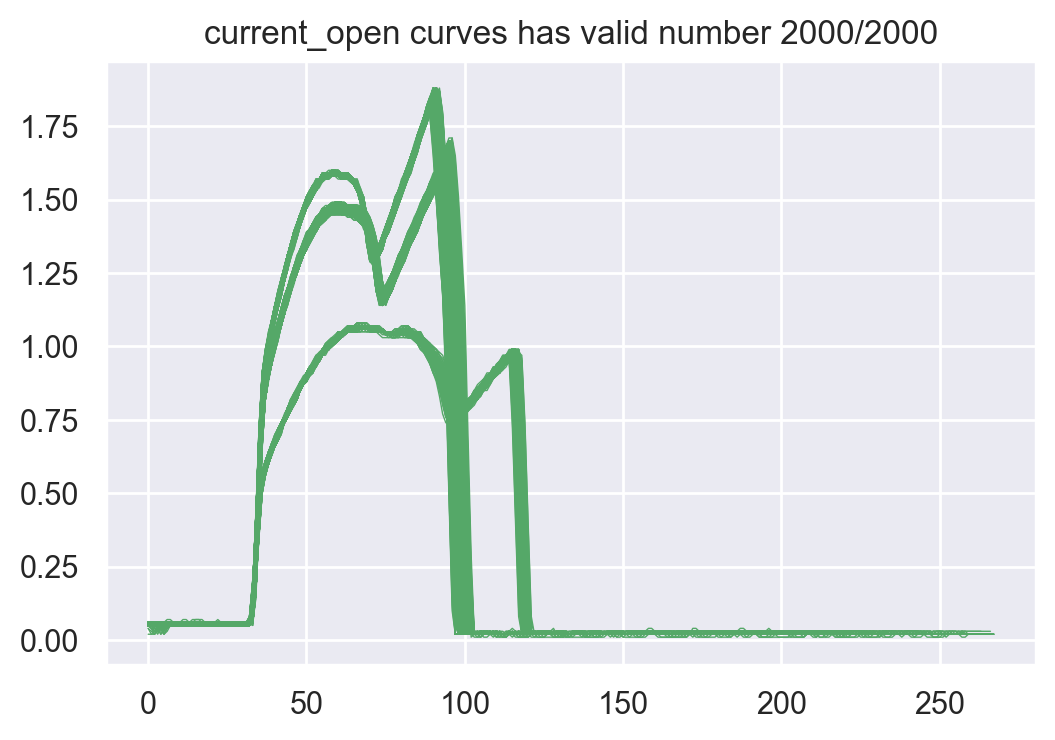

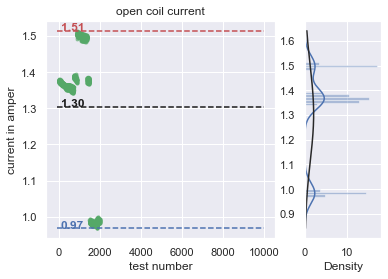

In [2]:
cur_val_list = ME.DataClean.curve_preview(dir_data_washed, 
                                        'current_open', 
                                        # up_thr=6, 
                                        # low_thr=0, 
                                        # avg_min=0.1, 
                                        # head_up_thr=0.1,
                                        # tail_up_thr=0.5,
                                        )   

# for each valid curve, calculate parameter
open_cur_list = []
for file in cur_val_list:

	coil_current_df = pd.read_csv(os.path.join(dir_data_washed, file),
									header=0)
	coil_current_arr = np.array(coil_current_df['Data'])

	# calculate current parameters
	_, _, _, _, current_avg = ME.MechOperMconfig.cal_cur_avg_noself(coil_current_arr,
																	invalid_title='invalid_open_current_curve {}'.format(file))
	# if current_avg >=3.6:
	open_cur_list.append(current_avg)
    # else:
    #     pass

# distribution plot
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(open_cur_list,
                                  title='open coil current',
                                  ylabel='current in amper')

## 3.3_Close coil current

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
close coil current0.13    1.36    1.15    1.54    1.34    1.35    1.10    0.44    41.00   59.00   


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


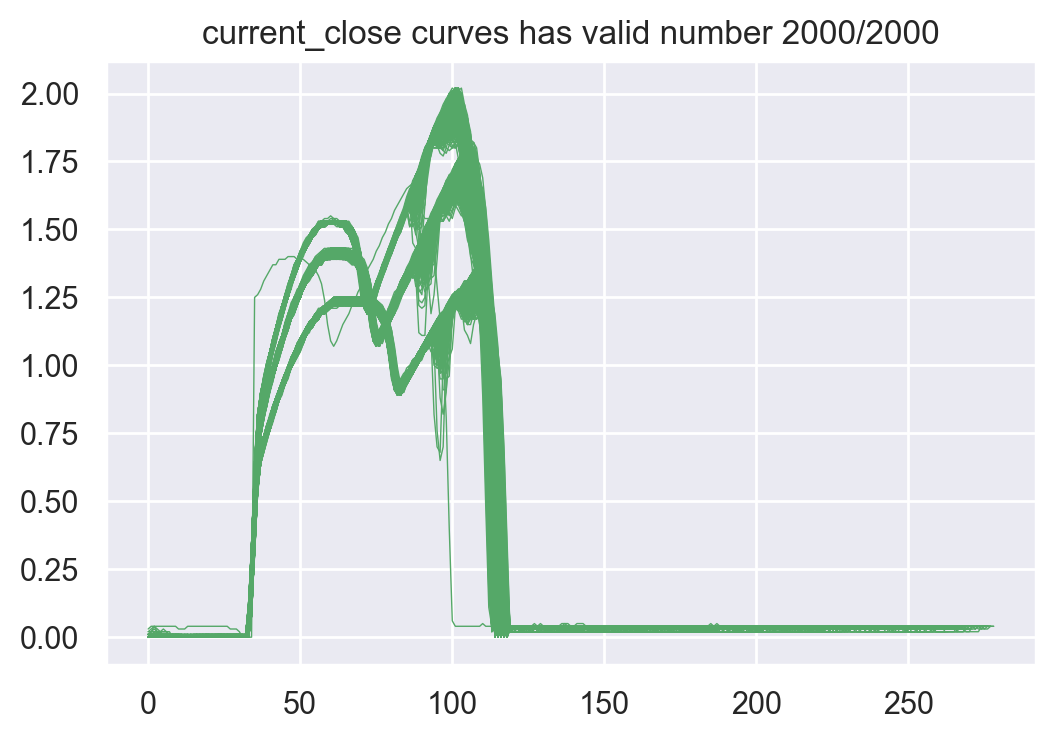

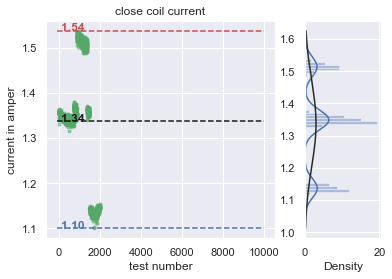

In [3]:
# preview
cur_val_list = ME.DataClean.curve_preview(dir_data_washed, 
                                        'current_close', 
                                        # up_thr=10, 
                                        # low_thr=0, 
                                        # avg_min=0.1, 
                                        # head_up_thr=0.1,
                                        # tail_up_thr=0.5
                                        )   

# for each valid curve, calculate parameter
close_cur_list = []
for file in cur_val_list:

    coil_current_df = pd.read_csv(os.path.join(dir_data_washed, file),
                                    header=0)
    coil_current_arr = np.array(coil_current_df['Data'])
    
    # calculate current parameters
    _, _, _, _, current_avg = ME.MechOperMconfig.cal_cur_avg_noself(coil_current_arr,
                                                                    invalid_title='invalid_close_current_curve {}'.format(file))
    # if current_avg >=3.6:
    close_cur_list.append(current_avg)
    # else:
    #     pass

# distribution plot
print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(close_cur_list,
                                  title='close coil current',
                                  ylabel='current in amper')

## 3.4_Motor_current

---------------------------------------------------------------------------------------------------
para              std     start   end     max     mean    median  min     span    alm_u   alm_l   
---------------------------------------------------------------------------------------------------
motor current     0.06    1.07    1.15    1.27    1.13    1.14    0.92    0.35    59.00   41.00   
charge time       0.86    5.72    7.16    7.92    5.89    5.66    4.36    3.56    62.00   38.00   


c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)
c:\Users\cnbofan1\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

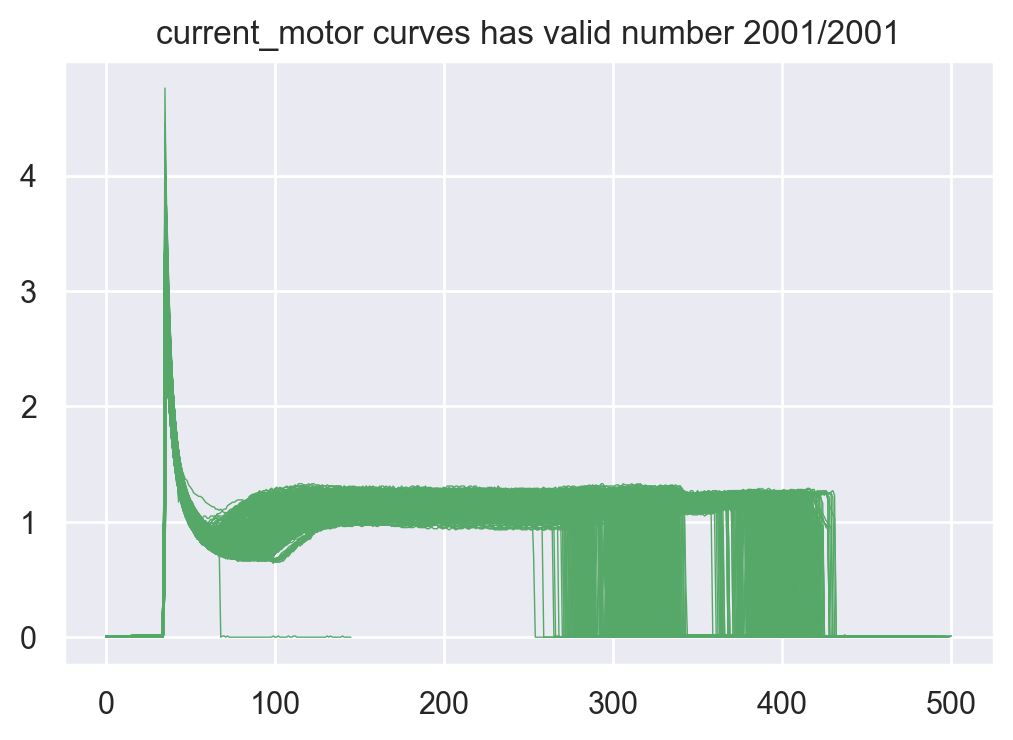

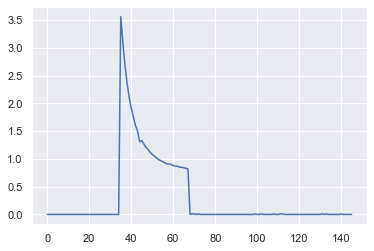

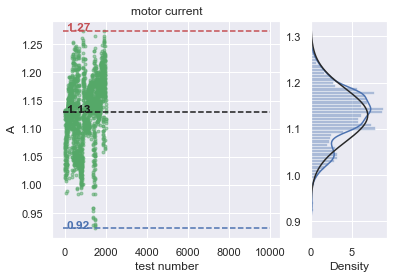

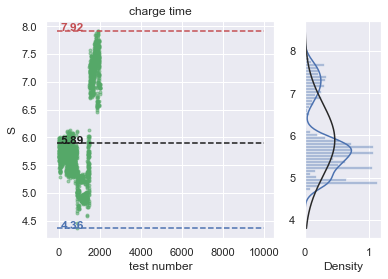

In [8]:
# preview
val_list = ME.DataClean.curve_preview(dir_data_washed, 
                                      'current_motor', 
                                    #   up_thr=2, 
                                    #   low_thr=0, 
                                      avg_min=2.5, 
                                    #   tail_up_thr=0.3,
                                      )

# for each valid curve, calculate parameter
motor_curr_list, charge_time_list = [], []
cnt_inval = 0
for file in val_list:

  current_df = pd.read_csv(os.path.join(dir_data_washed, file),
                header=0)
  current_arr = np.array(current_df['Data'])

  # calculate current parameters
  start_ix, end_ix, left_ix, right_ix, current_avg, charge_time = ME.MechOperMconfig.cal_motor_para_noself(current_arr,
                                                      # threshold=0.25,
                                                      )
  if (charge_time <= 1):
      plt.figure()
      plt.plot(current_arr)
  else:
    motor_curr_list.append(current_avg)
    charge_time_list.append(charge_time)

# distribution plot

print('---------------------------------------------------------------------------------------------------')
print('{:<18}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}{:<8}'.format('para', 'std',
                                                                        'start', 'end',
                                                                        'max', 'mean',
                                                                        'median', 'min',
                                                                        'span', 'alm_u',
                                                                        'alm_l'))
print('---------------------------------------------------------------------------------------------------')
ME.MechOperMconfig.para_dist_plot(motor_curr_list,
                                  title='motor current',
                                  ylabel='A')
ME.MechOperMconfig.para_dist_plot(charge_time_list,
                                  title='charge time',
                                  ylabel='S')